<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/05_Linear_Classifiers_in_Python/02_Loss_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-labs/main/34_Unsupervised_Learning_in_Python/dataset/Grains/seeds-width-vs-length.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
grains = pd.read_csv(url, header=None)
display(grains.head())

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


**How models make predictions**  
Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

-- Both logistic regression and Linear SVMs

 *since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.*

**Changing the model coefficients**  
When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with fit), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as X and y, along with a linear classifier object model.

In [8]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
        """Plot the decision boundaries for a classifier.

        Parameters
        ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
        """
        if proba:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
        return out


def make_meshgrid(x, y, h=.02, lims=None):
        """Create a mesh of points to plot in

        Parameters
        ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

        Returns
        -------
        xx, yy : ndarray
        """

        if lims is None:
            x_min, x_max = x.min() - 1, x.max() + 1
            y_min, y_max = y.min() - 1, y.max() + 1
        else:
            x_min, x_max, y_min, y_max = lims
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        return xx, yy

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1, lims=lims)

        if ax is None:
            plt.figure()
            ax = plt.gca()
            show = True
        else:
            show = False

        # can abstract some of this into a higher-level function for learners to call
        cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
        if proba:
            cbar = plt.colorbar(cs)
            cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
            cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
        labels = np.unique(y)
        if len(labels) == 2:
            ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
            ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
        else:
            ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
        if ticks:
            ax.set_xticks(())
            ax.set_yticks(())
    #     ax.set_title(title)
        if show:
            plt.show()
        else:
            return ax


def plot_4_classifiers(X, y, clfs):

        # Set-up 2x2 grid for plotting.
        fig, sub = plt.subplots(2, 2)
        plt.subplots_adjust(wspace=0.2, hspace=0.2)

        for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
            # clf.fit(X, y)
            plot_classifier(X, y, clf, ax, ticks=True)
            ax.set_title(title)
        plt.show()

/tmp/ipython-input-8-3495182117.py:67: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
/tmp/ipython-input-8-3495182117.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')


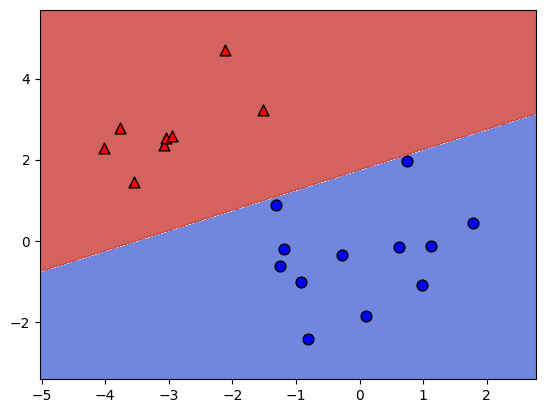

Number of errors: 0


In [14]:
# As you've been experiencing, the coefficients determine the slope of the boundary and the intercept shifts it.

import numpy as np
from sklearn.linear_model import LogisticRegression


X = [
    [1.78862847, 0.43650985],
    [0.09649747, -1.8634927],
    [-0.2773882, -0.35475898],
    [-3.08274148, 2.37299932],
    [-3.04381817, 2.52278197],
    [-1.31386475, 0.88462238],
    [-2.11868196, 4.70957306],
    [-2.94996636, 2.59532259],
    [-3.54535995, 1.45352268],
    [0.98236743, -1.10106763],
    [-1.18504653, -0.2056499],
    [-1.51385164, 3.23671627],
    [-4.02378514, 2.2870068],
    [0.62524497, -0.16051336],
    [-3.76883635, 2.76996928],
    [0.74505627, 1.97611078],
    [-1.24412333, -0.62641691],
    [-0.80376609, -2.41908317],
    [-0.92379202, -1.02387576],
    [1.12397796, -0.13191423]
]


y = [-1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

X = np.array(X)

model = LogisticRegression()

# Fit the model before setting coefficients
model.fit(X, y)

# Set the coefficients
model.coef_ = np.array([[-2,4]])                # twick the value and see the change
model.intercept_ = np.array([-7])               # twick the value and see the change

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

**The 0-1 loss**  
In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?

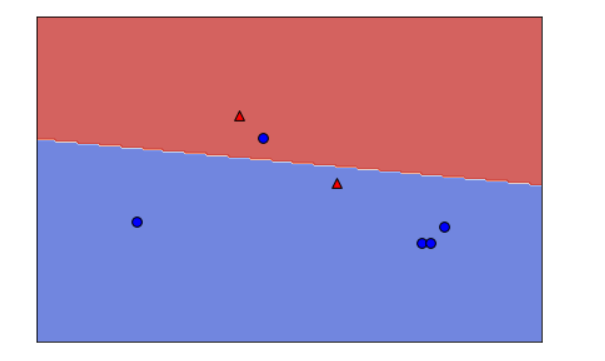

-> 2

**Minimizing a loss function**  
In this exercise you'll implement linear regression "from scratch" using  
        scipy.optimize.minimize.

We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

In [26]:
# The squared error, summed over training examples

X = [[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98], [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14], [0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03], [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94], [0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33], [0.02985, 0.0, 2.18, 0.0, 0.458, 6.43, 58.7, 6.0622, 3.0, 222.0, 18.7, 394.12, 5.21], [0.08829, 12.5, 7.87, 0.0, 0.524, 6.012, 66.6, 5.5605, 5.0, 311.0, 15.2, 395.6, 12.43], [0.14455, 12.5, 7.87, 0.0, 0.524, 6.172, 96.1, 5.9505, 5.0, 311.0, 15.2, 396.9, 19.15], [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631, 100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93], [0.17004, 12.5, 7.87, 0.0, 0.524, 6.004, 85.9, 6.5921, 5.0, 311.0, 15.2, 386.71, 17.1], [0.22489, 12.5, 7.87, 0.0, 0.524, 6.377, 94.3, 6.3467, 5.0, 311.0, 15.2, 392.52, 20.45], [0.11747, 12.5, 7.87, 0.0, 0.524, 6.009, 82.9, 6.2267, 5.0, 311.0, 15.2, 396.9, 13.27], [0.09378, 12.5, 7.87, 0.0, 0.524, 5.889, 39.0, 5.4509, 5.0, 311.0, 15.2, 390.5, 15.71], [0.62976, 0.0, 8.14, 0.0, 0.538, 5.949, 61.8, 4.7075, 4.0, 307.0, 21.0, 396.9, 8.26], [0.63796, 0.0, 8.14, 0.0, 0.538, 6.096, 84.5, 4.4619, 4.0, 307.0, 21.0, 380.02, 10.26], [0.62739, 0.0, 8.14, 0.0, 0.538, 5.834, 56.5, 4.4986, 4.0, 307.0, 21.0, 395.62, 8.47], [1.05393, 0.0, 8.14, 0.0, 0.538, 5.935, 29.3, 4.4986, 4.0, 307.0, 21.0, 386.85, 6.58], [0.7842, 0.0, 8.14, 0.0, 0.538, 5.99, 81.7, 4.2579, 4.0, 307.0, 21.0, 386.75, 14.67], [0.80271, 0.0, 8.14, 0.0, 0.538, 5.456, 36.6, 3.7965, 4.0, 307.0, 21.0, 288.99, 11.69], [0.7258, 0.0, 8.14, 0.0, 0.538, 5.727, 69.5, 3.7965, 4.0, 307.0, 21.0, 390.95, 11.28], [1.25179, 0.0, 8.14, 0.0, 0.538, 5.57, 98.1, 3.7979, 4.0, 307.0, 21.0, 376.57, 21.02], [0.85204, 0.0, 8.14, 0.0, 0.538, 5.965, 89.2, 4.0123, 4.0, 307.0, 21.0, 392.53, 13.83], [1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7, 3.9769, 4.0, 307.0, 21.0, 396.9, 18.72], [0.98843, 0.0, 8.14, 0.0, 0.538, 5.813, 100.0, 4.0952, 4.0, 307.0, 21.0, 394.54, 19.88], [0.75026, 0.0, 8.14, 0.0, 0.538, 5.924, 94.1, 4.3996, 4.0, 307.0, 21.0, 394.33, 16.3], [0.84054, 0.0, 8.14, 0.0, 0.538, 5.599, 85.7, 4.4546, 4.0, 307.0, 21.0, 303.42, 16.51], [0.67191, 0.0, 8.14, 0.0, 0.538, 5.813, 90.3, 4.682, 4.0, 307.0, 21.0, 376.88, 14.81], [0.95577, 0.0, 8.14, 0.0, 0.538, 6.047, 88.8, 4.4534, 4.0, 307.0, 21.0, 306.38, 17.28], [0.77299, 0.0, 8.14, 0.0, 0.538, 6.495, 94.4, 4.4547, 4.0, 307.0, 21.0, 387.94, 12.8], [1.00245, 0.0, 8.14, 0.0, 0.538, 6.674, 87.3, 4.239, 4.0, 307.0, 21.0, 380.23, 11.98], [1.13081, 0.0, 8.14, 0.0, 0.538, 5.713, 94.1, 4.233, 4.0, 307.0, 21.0, 360.17, 22.6], [1.35472, 0.0, 8.14, 0.0, 0.538, 6.072, 100.0, 4.175, 4.0, 307.0, 21.0, 376.73, 13.04], [1.38799, 0.0, 8.14, 0.0, 0.538, 5.95, 82.0, 3.99, 4.0, 307.0, 21.0, 232.6, 27.71], [1.15172, 0.0, 8.14, 0.0, 0.538, 5.701, 95.0, 3.7872, 4.0, 307.0, 21.0, 358.77, 18.35], [1.61282, 0.0, 8.14, 0.0, 0.538, 6.096, 96.9, 3.7598, 4.0, 307.0, 21.0, 248.31, 20.34], [0.06417, 0.0, 5.96, 0.0, 0.499, 5.933, 68.2, 3.3603, 5.0, 279.0, 19.2, 396.9, 9.68], [0.09744, 0.0, 5.96, 0.0, 0.499, 5.841, 61.4, 3.3779, 5.0, 279.0, 19.2, 377.56, 11.41], [0.08014, 0.0, 5.96, 0.0, 0.499, 5.85, 41.5, 3.9342, 5.0, 279.0, 19.2, 396.9, 8.77], [0.17505, 0.0, 5.96, 0.0, 0.499, 5.966, 30.2, 3.8473, 5.0, 279.0, 19.2, 393.43, 10.13], [0.02763, 75.0, 2.95, 0.0, 0.428, 6.595, 21.8, 5.4011, 3.0, 252.0, 18.3, 395.63, 4.32], [0.03359, 75.0, 2.95, 0.0, 0.428, 7.024, 15.8, 5.4011, 3.0, 252.0, 18.3, 395.62, 1.98], [0.12744, 0.0, 6.91, 0.0, 0.448, 6.77, 2.9, 5.7209, 3.0, 233.0, 17.9, 385.41, 4.84], [0.1415, 0.0, 6.91, 0.0, 0.448, 6.169, 6.6, 5.7209, 3.0, 233.0, 17.9, 383.37, 5.81], [0.15936, 0.0, 6.91, 0.0, 0.448, 6.211, 6.5, 5.7209, 3.0, 233.0, 17.9, 394.46, 7.44], [0.12269, 0.0, 6.91, 0.0, 0.448, 6.069, 40.0, 5.7209, 3.0, 233.0, 17.9, 389.39, 9.55], [0.17142, 0.0, 6.91, 0.0, 0.448, 5.682, 33.8, 5.1004, 3.0, 233.0, 17.9, 396.9, 10.21], [0.18836, 0.0, 6.91, 0.0, 0.448, 5.786, 33.3, 5.1004, 3.0, 233.0, 17.9, 396.9, 14.15], [0.22927, 0.0, 6.91, 0.0, 0.448, 6.03, 85.5, 5.6894, 3.0, 233.0, 17.9, 392.74, 18.8], [0.25387, 0.0, 6.91, 0.0, 0.448, 5.399, 95.3, 5.87, 3.0, 233.0, 17.9, 396.9, 30.81], [0.21977, 0.0, 6.91, 0.0, 0.448, 5.602, 62.0, 6.0877, 3.0, 233.0, 17.9, 396.9, 16.2], [0.08873, 21.0, 5.64, 0.0, 0.439, 5.963, 45.7, 6.8147, 4.0, 243.0, 16.8, 395.56, 13.45], [0.04337, 21.0, 5.64, 0.0, 0.439, 6.115, 63.0, 6.8147, 4.0, 243.0, 16.8, 393.97, 9.43], [0.0536, 21.0, 5.64, 0.0, 0.439, 6.511, 21.1, 6.8147, 4.0, 243.0, 16.8, 396.9, 5.28], [0.04981, 21.0, 5.64, 0.0, 0.439, 5.998, 21.4, 6.8147, 4.0, 243.0, 16.8, 396.9, 8.43], [0.0136, 75.0, 4.0, 0.0, 0.41, 5.888, 47.6, 7.3197, 3.0, 469.0, 21.1, 396.9, 14.8], [0.01311, 90.0, 1.22, 0.0, 0.403, 7.249, 21.9, 8.6966, 5.0, 226.0, 17.9, 395.93, 4.81], [0.02055, 85.0, 0.74, 0.0, 0.41, 6.383, 35.7, 9.1876, 2.0, 313.0, 17.3, 396.9, 5.77], [0.01432, 100.0, 1.32, 0.0, 0.411, 6.816, 40.5, 8.3248, 5.0, 256.0, 15.1, 392.9, 3.95], [0.15445, 25.0, 5.13, 0.0, 0.453, 6.145, 29.2, 7.8148, 8.0, 284.0, 19.7, 390.68, 6.86], [0.10328, 25.0, 5.13, 0.0, 0.453, 5.927, 47.2, 6.932, 8.0, 284.0, 19.7, 396.9, 9.22], [0.14932, 25.0, 5.13, 0.0, 0.453, 5.741, 66.2, 7.2254, 8.0, 284.0, 19.7, 395.11, 13.15], [0.17171, 25.0, 5.13, 0.0, 0.453, 5.966, 93.4, 6.8185, 8.0, 284.0, 19.7, 378.08, 14.44], [0.11027, 25.0, 5.13, 0.0, 0.453, 6.456, 67.8, 7.2255, 8.0, 284.0, 19.7, 396.9, 6.73], [0.1265, 25.0, 5.13, 0.0, 0.453, 6.762, 43.4, 7.9809, 8.0, 284.0, 19.7, 395.58, 9.5], [0.01951, 17.5, 1.38, 0.0, 0.4161, 7.104, 59.5, 9.2229, 3.0, 216.0, 18.6, 393.24, 8.05], [0.03584, 80.0, 3.37, 0.0, 0.398, 6.29, 17.8, 6.6115, 4.0, 337.0, 16.1, 396.9, 4.67], [0.04379, 80.0, 3.37, 0.0, 0.398, 5.787, 31.1, 6.6115, 4.0, 337.0, 16.1, 396.9, 10.24], [0.05789, 12.5, 6.07, 0.0, 0.409, 5.878, 21.4, 6.498, 4.0, 345.0, 18.9, 396.21, 8.1], [0.13554, 12.5, 6.07, 0.0, 0.409, 5.594, 36.8, 6.498, 4.0, 345.0, 18.9, 396.9, 13.09], [0.12816, 12.5, 6.07, 0.0, 0.409, 5.885, 33.0, 6.498, 4.0, 345.0, 18.9, 396.9, 8.79], [0.08826, 0.0, 10.81, 0.0, 0.413, 6.417, 6.6, 5.2873, 4.0, 305.0, 19.2, 383.73, 6.72], [0.15876, 0.0, 10.81, 0.0, 0.413, 5.961, 17.5, 5.2873, 4.0, 305.0, 19.2, 376.94, 9.88], [0.09164, 0.0, 10.81, 0.0, 0.413, 6.065, 7.8, 5.2873, 4.0, 305.0, 19.2, 390.91, 5.52], [0.19539, 0.0, 10.81, 0.0, 0.413, 6.245, 6.2, 5.2873, 4.0, 305.0, 19.2, 377.17, 7.54], [0.07896, 0.0, 12.83, 0.0, 0.437, 6.273, 6.0, 4.2515, 5.0, 398.0, 18.7, 394.92, 6.78], [0.09512, 0.0, 12.83, 0.0, 0.437, 6.286, 45.0, 4.5026, 5.0, 398.0, 18.7, 383.23, 8.94], [0.10153, 0.0, 12.83, 0.0, 0.437, 6.279, 74.5, 4.0522, 5.0, 398.0, 18.7, 373.66, 11.97], [0.08707, 0.0, 12.83, 0.0, 0.437, 6.14, 45.8, 4.0905, 5.0, 398.0, 18.7, 386.96, 10.27], [0.05646, 0.0, 12.83, 0.0, 0.437, 6.232, 53.7, 5.0141, 5.0, 398.0, 18.7, 386.4, 12.34], [0.08387, 0.0, 12.83, 0.0, 0.437, 5.874, 36.6, 4.5026, 5.0, 398.0, 18.7, 396.06, 9.1], [0.04113, 25.0, 4.86, 0.0, 0.426, 6.727, 33.5, 5.4007, 4.0, 281.0, 19.0, 396.9, 5.29], [0.04462, 25.0, 4.86, 0.0, 0.426, 6.619, 70.4, 5.4007, 4.0, 281.0, 19.0, 395.63, 7.22], [0.03659, 25.0, 4.86, 0.0, 0.426, 6.302, 32.2, 5.4007, 4.0, 281.0, 19.0, 396.9, 6.72], [0.03551, 25.0, 4.86, 0.0, 0.426, 6.167, 46.7, 5.4007, 4.0, 281.0, 19.0, 390.64, 7.51], [0.05059, 0.0, 4.49, 0.0, 0.449, 6.389, 48.0, 4.7794, 3.0, 247.0, 18.5, 396.9, 9.62], [0.05735, 0.0, 4.49, 0.0, 0.449, 6.63, 56.1, 4.4377, 3.0, 247.0, 18.5, 392.3, 6.53], [0.05188, 0.0, 4.49, 0.0, 0.449, 6.015, 45.1, 4.4272, 3.0, 247.0, 18.5, 395.99, 12.86], [0.07151, 0.0, 4.49, 0.0, 0.449, 6.121, 56.8, 3.7476, 3.0, 247.0, 18.5, 395.15, 8.44], [0.0566, 0.0, 3.41, 0.0, 0.489, 7.007, 86.3, 3.4217, 2.0, 270.0, 17.8, 396.9, 5.5], [0.05302, 0.0, 3.41, 0.0, 0.489, 7.079, 63.1, 3.4145, 2.0, 270.0, 17.8, 396.06, 5.7], [0.04684, 0.0, 3.41, 0.0, 0.489, 6.417, 66.1, 3.0923, 2.0, 270.0, 17.8, 392.18, 8.81], [0.03932, 0.0, 3.41, 0.0, 0.489, 6.405, 73.9, 3.0921, 2.0, 270.0, 17.8, 393.55, 8.2], [0.04203, 28.0, 15.04, 0.0, 0.464, 6.442, 53.6, 3.6659, 4.0, 270.0, 18.2, 395.01, 8.16], [0.02875, 28.0, 15.04, 0.0, 0.464, 6.211, 28.9, 3.6659, 4.0, 270.0, 18.2, 396.33, 6.21], [0.04294, 28.0, 15.04, 0.0, 0.464, 6.249, 77.3, 3.615, 4.0, 270.0, 18.2, 396.9, 10.59], [0.12204, 0.0, 2.89, 0.0, 0.445, 6.625, 57.8, 3.4952, 2.0, 276.0, 18.0, 357.98, 6.65], [0.11504, 0.0, 2.89, 0.0, 0.445, 6.163, 69.6, 3.4952, 2.0, 276.0, 18.0, 391.83, 11.34], [0.12083, 0.0, 2.89, 0.0, 0.445, 8.069, 76.0, 3.4952, 2.0, 276.0, 18.0, 396.9, 4.21], [0.08187, 0.0, 2.89, 0.0, 0.445, 7.82, 36.9, 3.4952, 2.0, 276.0, 18.0, 393.53, 3.57], [0.0686, 0.0, 2.89, 0.0, 0.445, 7.416, 62.5, 3.4952, 2.0, 276.0, 18.0, 396.9, 6.19], [0.14866, 0.0, 8.56, 0.0, 0.52, 6.727, 79.9, 2.7778, 5.0, 384.0, 20.9, 394.76, 9.42], [0.11432, 0.0, 8.56, 0.0, 0.52, 6.781, 71.3, 2.8561, 5.0, 384.0, 20.9, 395.58, 7.67], [0.22876, 0.0, 8.56, 0.0, 0.52, 6.405, 85.4, 2.7147, 5.0, 384.0, 20.9, 70.8, 10.63], [0.21161, 0.0, 8.56, 0.0, 0.52, 6.137, 87.4, 2.7147, 5.0, 384.0, 20.9, 394.47, 13.44], [0.1396, 0.0, 8.56, 0.0, 0.52, 6.167, 90.0, 2.421, 5.0, 384.0, 20.9, 392.69, 12.33], [0.13262, 0.0, 8.56, 0.0, 0.52, 5.851, 96.7, 2.1069, 5.0, 384.0, 20.9, 394.05, 16.47], [0.1712, 0.0, 8.56, 0.0, 0.52, 5.836, 91.9, 2.211, 5.0, 384.0, 20.9, 395.67, 18.66], [0.13117, 0.0, 8.56, 0.0, 0.52, 6.127, 85.2, 2.1224, 5.0, 384.0, 20.9, 387.69, 14.09], [0.12802, 0.0, 8.56, 0.0, 0.52, 6.474, 97.1, 2.4329, 5.0, 384.0, 20.9, 395.24, 12.27], [0.26363, 0.0, 8.56, 0.0, 0.52, 6.229, 91.2, 2.5451, 5.0, 384.0, 20.9, 391.23, 15.55], [0.10793, 0.0, 8.56, 0.0, 0.52, 6.195, 54.4, 2.7778, 5.0, 384.0, 20.9, 393.49, 13.0], [0.10084, 0.0, 10.01, 0.0, 0.547, 6.715, 81.6, 2.6775, 6.0, 432.0, 17.8, 395.59, 10.16], [0.12329, 0.0, 10.01, 0.0, 0.547, 5.913, 92.9, 2.3534, 6.0, 432.0, 17.8, 394.95, 16.21], [0.22212, 0.0, 10.01, 0.0, 0.547, 6.092, 95.4, 2.548, 6.0, 432.0, 17.8, 396.9, 17.09], [0.14231, 0.0, 10.01, 0.0, 0.547, 6.254, 84.2, 2.2565, 6.0, 432.0, 17.8, 388.74, 10.45], [0.17134, 0.0, 10.01, 0.0, 0.547, 5.928, 88.2, 2.4631, 6.0, 432.0, 17.8, 344.91, 15.76], [0.13158, 0.0, 10.01, 0.0, 0.547, 6.176, 72.5, 2.7301, 6.0, 432.0, 17.8, 393.3, 12.04], [0.15098, 0.0, 10.01, 0.0, 0.547, 6.021, 82.6, 2.7474, 6.0, 432.0, 17.8, 394.51, 10.3], [0.13058, 0.0, 10.01, 0.0, 0.547, 5.872, 73.1, 2.4775, 6.0, 432.0, 17.8, 338.63, 15.37], [0.14476, 0.0, 10.01, 0.0, 0.547, 5.731, 65.2, 2.7592, 6.0, 432.0, 17.8, 391.5, 13.61], [0.06899, 0.0, 25.65, 0.0, 0.581, 5.87, 69.7, 2.2577, 2.0, 188.0, 19.1, 389.15, 14.37], [0.07165, 0.0, 25.65, 0.0, 0.581, 6.004, 84.1, 2.1974, 2.0, 188.0, 19.1, 377.67, 14.27], [0.09299, 0.0, 25.65, 0.0, 0.581, 5.961, 92.9, 2.0869, 2.0, 188.0, 19.1, 378.09, 17.93], [0.15038, 0.0, 25.65, 0.0, 0.581, 5.856, 97.0, 1.9444, 2.0, 188.0, 19.1, 370.31, 25.41], [0.09849, 0.0, 25.65, 0.0, 0.581, 5.879, 95.8, 2.0063, 2.0, 188.0, 19.1, 379.38, 17.58], [0.16902, 0.0, 25.65, 0.0, 0.581, 5.986, 88.4, 1.9929, 2.0, 188.0, 19.1, 385.02, 14.81], [0.38735, 0.0, 25.65, 0.0, 0.581, 5.613, 95.6, 1.7572, 2.0, 188.0, 19.1, 359.29, 27.26], [0.25915, 0.0, 21.89, 0.0, 0.624, 5.693, 96.0, 1.7883, 4.0, 437.0, 21.2, 392.11, 17.19], [0.32543, 0.0, 21.89, 0.0, 0.624, 6.431, 98.8, 1.8125, 4.0, 437.0, 21.2, 396.9, 15.39], [0.88125, 0.0, 21.89, 0.0, 0.624, 5.637, 94.7, 1.9799, 4.0, 437.0, 21.2, 396.9, 18.34], [0.34006, 0.0, 21.89, 0.0, 0.624, 6.458, 98.9, 2.1185, 4.0, 437.0, 21.2, 395.04, 12.6], [1.19294, 0.0, 21.89, 0.0, 0.624, 6.326, 97.7, 2.271, 4.0, 437.0, 21.2, 396.9, 12.26], [0.59005, 0.0, 21.89, 0.0, 0.624, 6.372, 97.9, 2.3274, 4.0, 437.0, 21.2, 385.76, 11.12], [0.32982, 0.0, 21.89, 0.0, 0.624, 5.822, 95.4, 2.4699, 4.0, 437.0, 21.2, 388.69, 15.03], [0.97617, 0.0, 21.89, 0.0, 0.624, 5.757, 98.4, 2.346, 4.0, 437.0, 21.2, 262.76, 17.31], [0.55778, 0.0, 21.89, 0.0, 0.624, 6.335, 98.2, 2.1107, 4.0, 437.0, 21.2, 394.67, 16.96], [0.32264, 0.0, 21.89, 0.0, 0.624, 5.942, 93.5, 1.9669, 4.0, 437.0, 21.2, 378.25, 16.9], [0.35233, 0.0, 21.89, 0.0, 0.624, 6.454, 98.4, 1.8498, 4.0, 437.0, 21.2, 394.08, 14.59], [0.2498, 0.0, 21.89, 0.0, 0.624, 5.857, 98.2, 1.6686, 4.0, 437.0, 21.2, 392.04, 21.32], [0.54452, 0.0, 21.89, 0.0, 0.624, 6.151, 97.9, 1.6687, 4.0, 437.0, 21.2, 396.9, 18.46], [0.2909, 0.0, 21.89, 0.0, 0.624, 6.174, 93.6, 1.6119, 4.0, 437.0, 21.2, 388.08, 24.16], [1.62864, 0.0, 21.89, 0.0, 0.624, 5.019, 100.0, 1.4394, 4.0, 437.0, 21.2, 396.9, 34.41], [3.32105, 0.0, 19.58, 1.0, 0.871, 5.403, 100.0, 1.3216, 5.0, 403.0, 14.7, 396.9, 26.82], [4.0974, 0.0, 19.58, 0.0, 0.871, 5.468, 100.0, 1.4118, 5.0, 403.0, 14.7, 396.9, 26.42], [2.77974, 0.0, 19.58, 0.0, 0.871, 4.903, 97.8, 1.3459, 5.0, 403.0, 14.7, 396.9, 29.29], [2.37934, 0.0, 19.58, 0.0, 0.871, 6.13, 100.0, 1.4191, 5.0, 403.0, 14.7, 172.91, 27.8], [2.15505, 0.0, 19.58, 0.0, 0.871, 5.628, 100.0, 1.5166, 5.0, 403.0, 14.7, 169.27, 16.65], [2.36862, 0.0, 19.58, 0.0, 0.871, 4.926, 95.7, 1.4608, 5.0, 403.0, 14.7, 391.71, 29.53], [2.33099, 0.0, 19.58, 0.0, 0.871, 5.186, 93.8, 1.5296, 5.0, 403.0, 14.7, 356.99, 28.32], [2.73397, 0.0, 19.58, 0.0, 0.871, 5.597, 94.9, 1.5257, 5.0, 403.0, 14.7, 351.85, 21.45], [1.6566, 0.0, 19.58, 0.0, 0.871, 6.122, 97.3, 1.618, 5.0, 403.0, 14.7, 372.8, 14.1], [1.49632, 0.0, 19.58, 0.0, 0.871, 5.404, 100.0, 1.5916, 5.0, 403.0, 14.7, 341.6, 13.28], [1.12658, 0.0, 19.58, 1.0, 0.871, 5.012, 88.0, 1.6102, 5.0, 403.0, 14.7, 343.28, 12.12], [2.14918, 0.0, 19.58, 0.0, 0.871, 5.709, 98.5, 1.6232, 5.0, 403.0, 14.7, 261.95, 15.79], [1.41385, 0.0, 19.58, 1.0, 0.871, 6.129, 96.0, 1.7494, 5.0, 403.0, 14.7, 321.02, 15.12], [3.53501, 0.0, 19.58, 1.0, 0.871, 6.152, 82.6, 1.7455, 5.0, 403.0, 14.7, 88.01, 15.02], [2.44668, 0.0, 19.58, 0.0, 0.871, 5.272, 94.0, 1.7364, 5.0, 403.0, 14.7, 88.63, 16.14], [1.22358, 0.0, 19.58, 0.0, 0.605, 6.943, 97.4, 1.8773, 5.0, 403.0, 14.7, 363.43, 4.59], [1.34284, 0.0, 19.58, 0.0, 0.605, 6.066, 100.0, 1.7573, 5.0, 403.0, 14.7, 353.89, 6.43], [1.42502, 0.0, 19.58, 0.0, 0.871, 6.51, 100.0, 1.7659, 5.0, 403.0, 14.7, 364.31, 7.39], [1.27346, 0.0, 19.58, 1.0, 0.605, 6.25, 92.6, 1.7984, 5.0, 403.0, 14.7, 338.92, 5.5], [1.46336, 0.0, 19.58, 0.0, 0.605, 7.489, 90.8, 1.9709, 5.0, 403.0, 14.7, 374.43, 1.73], [1.83377, 0.0, 19.58, 1.0, 0.605, 7.802, 98.2, 2.0407, 5.0, 403.0, 14.7, 389.61, 1.92], [1.51902, 0.0, 19.58, 1.0, 0.605, 8.375, 93.9, 2.162, 5.0, 403.0, 14.7, 388.45, 3.32], [2.24236, 0.0, 19.58, 0.0, 0.605, 5.854, 91.8, 2.422, 5.0, 403.0, 14.7, 395.11, 11.64], [2.924, 0.0, 19.58, 0.0, 0.605, 6.101, 93.0, 2.2834, 5.0, 403.0, 14.7, 240.16, 9.81], [2.01019, 0.0, 19.58, 0.0, 0.605, 7.929, 96.2, 2.0459, 5.0, 403.0, 14.7, 369.3, 3.7], [1.80028, 0.0, 19.58, 0.0, 0.605, 5.877, 79.2, 2.4259, 5.0, 403.0, 14.7, 227.61, 12.14], [2.3004, 0.0, 19.58, 0.0, 0.605, 6.319, 96.1, 2.1, 5.0, 403.0, 14.7, 297.09, 11.1], [2.44953, 0.0, 19.58, 0.0, 0.605, 6.402, 95.2, 2.2625, 5.0, 403.0, 14.7, 330.04, 11.32], [1.20742, 0.0, 19.58, 0.0, 0.605, 5.875, 94.6, 2.4259, 5.0, 403.0, 14.7, 292.29, 14.43], [2.3139, 0.0, 19.58, 0.0, 0.605, 5.88, 97.3, 2.3887, 5.0, 403.0, 14.7, 348.13, 12.03], [0.13914, 0.0, 4.05, 0.0, 0.51, 5.572, 88.5, 2.5961, 5.0, 296.0, 16.6, 396.9, 14.69], [0.09178, 0.0, 4.05, 0.0, 0.51, 6.416, 84.1, 2.6463, 5.0, 296.0, 16.6, 395.5, 9.04], [0.08447, 0.0, 4.05, 0.0, 0.51, 5.859, 68.7, 2.7019, 5.0, 296.0, 16.6, 393.23, 9.64], [0.06664, 0.0, 4.05, 0.0, 0.51, 6.546, 33.1, 3.1323, 5.0, 296.0, 16.6, 390.96, 5.33], [0.07022, 0.0, 4.05, 0.0, 0.51, 6.02, 47.2, 3.5549, 5.0, 296.0, 16.6, 393.23, 10.11], [0.05425, 0.0, 4.05, 0.0, 0.51, 6.315, 73.4, 3.3175, 5.0, 296.0, 16.6, 395.6, 6.29], [0.06642, 0.0, 4.05, 0.0, 0.51, 6.86, 74.4, 2.9153, 5.0, 296.0, 16.6, 391.27, 6.92], [0.0578, 0.0, 2.46, 0.0, 0.488, 6.98, 58.4, 2.829, 3.0, 193.0, 17.8, 396.9, 5.04], [0.06588, 0.0, 2.46, 0.0, 0.488, 7.765, 83.3, 2.741, 3.0, 193.0, 17.8, 395.56, 7.56], [0.06888, 0.0, 2.46, 0.0, 0.488, 6.144, 62.2, 2.5979, 3.0, 193.0, 17.8, 396.9, 9.45], [0.09103, 0.0, 2.46, 0.0, 0.488, 7.155, 92.2, 2.7006, 3.0, 193.0, 17.8, 394.12, 4.82], [0.10008, 0.0, 2.46, 0.0, 0.488, 6.563, 95.6, 2.847, 3.0, 193.0, 17.8, 396.9, 5.68], [0.08308, 0.0, 2.46, 0.0, 0.488, 5.604, 89.8, 2.9879, 3.0, 193.0, 17.8, 391.0, 13.98], [0.06047, 0.0, 2.46, 0.0, 0.488, 6.153, 68.8, 3.2797, 3.0, 193.0, 17.8, 387.11, 13.15], [0.05602, 0.0, 2.46, 0.0, 0.488, 7.831, 53.6, 3.1992, 3.0, 193.0, 17.8, 392.63, 4.45], [0.07875, 45.0, 3.44, 0.0, 0.437, 6.782, 41.1, 3.7886, 5.0, 398.0, 15.2, 393.87, 6.68], [0.12579, 45.0, 3.44, 0.0, 0.437, 6.556, 29.1, 4.5667, 5.0, 398.0, 15.2, 382.84, 4.56], [0.0837, 45.0, 3.44, 0.0, 0.437, 7.185, 38.9, 4.5667, 5.0, 398.0, 15.2, 396.9, 5.39], [0.09068, 45.0, 3.44, 0.0, 0.437, 6.951, 21.5, 6.4798, 5.0, 398.0, 15.2, 377.68, 5.1], [0.06911, 45.0, 3.44, 0.0, 0.437, 6.739, 30.8, 6.4798, 5.0, 398.0, 15.2, 389.71, 4.69], [0.08664, 45.0, 3.44, 0.0, 0.437, 7.178, 26.3, 6.4798, 5.0, 398.0, 15.2, 390.49, 2.87], [0.02187, 60.0, 2.93, 0.0, 0.401, 6.8, 9.9, 6.2196, 1.0, 265.0, 15.6, 393.37, 5.03], [0.01439, 60.0, 2.93, 0.0, 0.401, 6.604, 18.8, 6.2196, 1.0, 265.0, 15.6, 376.7, 4.38], [0.01381, 80.0, 0.46, 0.0, 0.422, 7.875, 32.0, 5.6484, 4.0, 255.0, 14.4, 394.23, 2.97], [0.04011, 80.0, 1.52, 0.0, 0.404, 7.287, 34.1, 7.309, 2.0, 329.0, 12.6, 396.9, 4.08], [0.04666, 80.0, 1.52, 0.0, 0.404, 7.107, 36.6, 7.309, 2.0, 329.0, 12.6, 354.31, 8.61], [0.03768, 80.0, 1.52, 0.0, 0.404, 7.274, 38.3, 7.309, 2.0, 329.0, 12.6, 392.2, 6.62], [0.0315, 95.0, 1.47, 0.0, 0.403, 6.975, 15.3, 7.6534, 3.0, 402.0, 17.0, 396.9, 4.56], [0.01778, 95.0, 1.47, 0.0, 0.403, 7.135, 13.9, 7.6534, 3.0, 402.0, 17.0, 384.3, 4.45], [0.03445, 82.5, 2.03, 0.0, 0.415, 6.162, 38.4, 6.27, 2.0, 348.0, 14.7, 393.77, 7.43], [0.02177, 82.5, 2.03, 0.0, 0.415, 7.61, 15.7, 6.27, 2.0, 348.0, 14.7, 395.38, 3.11], [0.0351, 95.0, 2.68, 0.0, 0.4161, 7.853, 33.2, 5.118, 4.0, 224.0, 14.7, 392.78, 3.81], [0.02009, 95.0, 2.68, 0.0, 0.4161, 8.034, 31.9, 5.118, 4.0, 224.0, 14.7, 390.55, 2.88], [0.13642, 0.0, 10.59, 0.0, 0.489, 5.891, 22.3, 3.9454, 4.0, 277.0, 18.6, 396.9, 10.87], [0.22969, 0.0, 10.59, 0.0, 0.489, 6.326, 52.5, 4.3549, 4.0, 277.0, 18.6, 394.87, 10.97], [0.25199, 0.0, 10.59, 0.0, 0.489, 5.783, 72.7, 4.3549, 4.0, 277.0, 18.6, 389.43, 18.06], [0.13587, 0.0, 10.59, 1.0, 0.489, 6.064, 59.1, 4.2392, 4.0, 277.0, 18.6, 381.32, 14.66], [0.43571, 0.0, 10.59, 1.0, 0.489, 5.344, 100.0, 3.875, 4.0, 277.0, 18.6, 396.9, 23.09], [0.17446, 0.0, 10.59, 1.0, 0.489, 5.96, 92.1, 3.8771, 4.0, 277.0, 18.6, 393.25, 17.27], [0.37578, 0.0, 10.59, 1.0, 0.489, 5.404, 88.6, 3.665, 4.0, 277.0, 18.6, 395.24, 23.98], [0.21719, 0.0, 10.59, 1.0, 0.489, 5.807, 53.8, 3.6526, 4.0, 277.0, 18.6, 390.94, 16.03], [0.14052, 0.0, 10.59, 0.0, 0.489, 6.375, 32.3, 3.9454, 4.0, 277.0, 18.6, 385.81, 9.38], [0.28955, 0.0, 10.59, 0.0, 0.489, 5.412, 9.8, 3.5875, 4.0, 277.0, 18.6, 348.93, 29.55], [0.19802, 0.0, 10.59, 0.0, 0.489, 6.182, 42.4, 3.9454, 4.0, 277.0, 18.6, 393.63, 9.47], [0.0456, 0.0, 13.89, 1.0, 0.55, 5.888, 56.0, 3.1121, 5.0, 276.0, 16.4, 392.8, 13.51], [0.07013, 0.0, 13.89, 0.0, 0.55, 6.642, 85.1, 3.4211, 5.0, 276.0, 16.4, 392.78, 9.69], [0.11069, 0.0, 13.89, 1.0, 0.55, 5.951, 93.8, 2.8893, 5.0, 276.0, 16.4, 396.9, 17.92], [0.11425, 0.0, 13.89, 1.0, 0.55, 6.373, 92.4, 3.3633, 5.0, 276.0, 16.4, 393.74, 10.5], [0.35809, 0.0, 6.2, 1.0, 0.507, 6.951, 88.5, 2.8617, 8.0, 307.0, 17.4, 391.7, 9.71], [0.40771, 0.0, 6.2, 1.0, 0.507, 6.164, 91.3, 3.048, 8.0, 307.0, 17.4, 395.24, 21.46], [0.62356, 0.0, 6.2, 1.0, 0.507, 6.879, 77.7, 3.2721, 8.0, 307.0, 17.4, 390.39, 9.93], [0.6147, 0.0, 6.2, 0.0, 0.507, 6.618, 80.8, 3.2721, 8.0, 307.0, 17.4, 396.9, 7.6], [0.31533, 0.0, 6.2, 0.0, 0.504, 8.266, 78.3, 2.8944, 8.0, 307.0, 17.4, 385.05, 4.14], [0.52693, 0.0, 6.2, 0.0, 0.504, 8.725, 83.0, 2.8944, 8.0, 307.0, 17.4, 382.0, 4.63], [0.38214, 0.0, 6.2, 0.0, 0.504, 8.04, 86.5, 3.2157, 8.0, 307.0, 17.4, 387.38, 3.13], [0.41238, 0.0, 6.2, 0.0, 0.504, 7.163, 79.9, 3.2157, 8.0, 307.0, 17.4, 372.08, 6.36], [0.29819, 0.0, 6.2, 0.0, 0.504, 7.686, 17.0, 3.3751, 8.0, 307.0, 17.4, 377.51, 3.92], [0.44178, 0.0, 6.2, 0.0, 0.504, 6.552, 21.4, 3.3751, 8.0, 307.0, 17.4, 380.34, 3.76], [0.537, 0.0, 6.2, 0.0, 0.504, 5.981, 68.1, 3.6715, 8.0, 307.0, 17.4, 378.35, 11.65], [0.46296, 0.0, 6.2, 0.0, 0.504, 7.412, 76.9, 3.6715, 8.0, 307.0, 17.4, 376.14, 5.25], [0.57529, 0.0, 6.2, 0.0, 0.507, 8.337, 73.3, 3.8384, 8.0, 307.0, 17.4, 385.91, 2.47], [0.33147, 0.0, 6.2, 0.0, 0.507, 8.247, 70.4, 3.6519, 8.0, 307.0, 17.4, 378.95, 3.95], [0.44791, 0.0, 6.2, 1.0, 0.507, 6.726, 66.5, 3.6519, 8.0, 307.0, 17.4, 360.2, 8.05], [0.33045, 0.0, 6.2, 0.0, 0.507, 6.086, 61.5, 3.6519, 8.0, 307.0, 17.4, 376.75, 10.88], [0.52058, 0.0, 6.2, 1.0, 0.507, 6.631, 76.5, 4.148, 8.0, 307.0, 17.4, 388.45, 9.54], [0.51183, 0.0, 6.2, 0.0, 0.507, 7.358, 71.6, 4.148, 8.0, 307.0, 17.4, 390.07, 4.73], [0.08244, 30.0, 4.93, 0.0, 0.428, 6.481, 18.5, 6.1899, 6.0, 300.0, 16.6, 379.41, 6.36], [0.09252, 30.0, 4.93, 0.0, 0.428, 6.606, 42.2, 6.1899, 6.0, 300.0, 16.6, 383.78, 7.37], [0.11329, 30.0, 4.93, 0.0, 0.428, 6.897, 54.3, 6.3361, 6.0, 300.0, 16.6, 391.25, 11.38], [0.10612, 30.0, 4.93, 0.0, 0.428, 6.095, 65.1, 6.3361, 6.0, 300.0, 16.6, 394.62, 12.4], [0.1029, 30.0, 4.93, 0.0, 0.428, 6.358, 52.9, 7.0355, 6.0, 300.0, 16.6, 372.75, 11.22], [0.12757, 30.0, 4.93, 0.0, 0.428, 6.393, 7.8, 7.0355, 6.0, 300.0, 16.6, 374.71, 5.19], [0.20608, 22.0, 5.86, 0.0, 0.431, 5.593, 76.5, 7.9549, 7.0, 330.0, 19.1, 372.49, 12.5], [0.19133, 22.0, 5.86, 0.0, 0.431, 5.605, 70.2, 7.9549, 7.0, 330.0, 19.1, 389.13, 18.46], [0.33983, 22.0, 5.86, 0.0, 0.431, 6.108, 34.9, 8.0555, 7.0, 330.0, 19.1, 390.18, 9.16], [0.19657, 22.0, 5.86, 0.0, 0.431, 6.226, 79.2, 8.0555, 7.0, 330.0, 19.1, 376.14, 10.15], [0.16439, 22.0, 5.86, 0.0, 0.431, 6.433, 49.1, 7.8265, 7.0, 330.0, 19.1, 374.71, 9.52], [0.19073, 22.0, 5.86, 0.0, 0.431, 6.718, 17.5, 7.8265, 7.0, 330.0, 19.1, 393.74, 6.56], [0.1403, 22.0, 5.86, 0.0, 0.431, 6.487, 13.0, 7.3967, 7.0, 330.0, 19.1, 396.28, 5.9], [0.21409, 22.0, 5.86, 0.0, 0.431, 6.438, 8.9, 7.3967, 7.0, 330.0, 19.1, 377.07, 3.59], [0.08221, 22.0, 5.86, 0.0, 0.431, 6.957, 6.8, 8.9067, 7.0, 330.0, 19.1, 386.09, 3.53], [0.36894, 22.0, 5.86, 0.0, 0.431, 8.259, 8.4, 8.9067, 7.0, 330.0, 19.1, 396.9, 3.54], [0.04819, 80.0, 3.64, 0.0, 0.392, 6.108, 32.0, 9.2203, 1.0, 315.0, 16.4, 392.89, 6.57], [0.03548, 80.0, 3.64, 0.0, 0.392, 5.876, 19.1, 9.2203, 1.0, 315.0, 16.4, 395.18, 9.25], [0.01538, 90.0, 3.75, 0.0, 0.394, 7.454, 34.2, 6.3361, 3.0, 244.0, 15.9, 386.34, 3.11], [0.61154, 20.0, 3.97, 0.0, 0.647, 8.704, 86.9, 1.801, 5.0, 264.0, 13.0, 389.7, 5.12], [0.66351, 20.0, 3.97, 0.0, 0.647, 7.333, 100.0, 1.8946, 5.0, 264.0, 13.0, 383.29, 7.79], [0.65665, 20.0, 3.97, 0.0, 0.647, 6.842, 100.0, 2.0107, 5.0, 264.0, 13.0, 391.93, 6.9], [0.54011, 20.0, 3.97, 0.0, 0.647, 7.203, 81.8, 2.1121, 5.0, 264.0, 13.0, 392.8, 9.59], [0.53412, 20.0, 3.97, 0.0, 0.647, 7.52, 89.4, 2.1398, 5.0, 264.0, 13.0, 388.37, 7.26], [0.52014, 20.0, 3.97, 0.0, 0.647, 8.398, 91.5, 2.2885, 5.0, 264.0, 13.0, 386.86, 5.91], [0.82526, 20.0, 3.97, 0.0, 0.647, 7.327, 94.5, 2.0788, 5.0, 264.0, 13.0, 393.42, 11.25], [0.55007, 20.0, 3.97, 0.0, 0.647, 7.206, 91.6, 1.9301, 5.0, 264.0, 13.0, 387.89, 8.1], [0.76162, 20.0, 3.97, 0.0, 0.647, 5.56, 62.8, 1.9865, 5.0, 264.0, 13.0, 392.4, 10.45], [0.7857, 20.0, 3.97, 0.0, 0.647, 7.014, 84.6, 2.1329, 5.0, 264.0, 13.0, 384.07, 14.79], [0.57834, 20.0, 3.97, 0.0, 0.575, 8.297, 67.0, 2.4216, 5.0, 264.0, 13.0, 384.54, 7.44], [0.5405, 20.0, 3.97, 0.0, 0.575, 7.47, 52.6, 2.872, 5.0, 264.0, 13.0, 390.3, 3.16], [0.09065, 20.0, 6.96, 1.0, 0.464, 5.92, 61.5, 3.9175, 3.0, 223.0, 18.6, 391.34, 13.65], [0.29916, 20.0, 6.96, 0.0, 0.464, 5.856, 42.1, 4.429, 3.0, 223.0, 18.6, 388.65, 13.0], [0.16211, 20.0, 6.96, 0.0, 0.464, 6.24, 16.3, 4.429, 3.0, 223.0, 18.6, 396.9, 6.59], [0.1146, 20.0, 6.96, 0.0, 0.464, 6.538, 58.7, 3.9175, 3.0, 223.0, 18.6, 394.96, 7.73], [0.22188, 20.0, 6.96, 1.0, 0.464, 7.691, 51.8, 4.3665, 3.0, 223.0, 18.6, 390.77, 6.58], [0.05644, 40.0, 6.41, 1.0, 0.447, 6.758, 32.9, 4.0776, 4.0, 254.0, 17.6, 396.9, 3.53], [0.09604, 40.0, 6.41, 0.0, 0.447, 6.854, 42.8, 4.2673, 4.0, 254.0, 17.6, 396.9, 2.98], [0.10469, 40.0, 6.41, 1.0, 0.447, 7.267, 49.0, 4.7872, 4.0, 254.0, 17.6, 389.25, 6.05], [0.06127, 40.0, 6.41, 1.0, 0.447, 6.826, 27.6, 4.8628, 4.0, 254.0, 17.6, 393.45, 4.16], [0.07978, 40.0, 6.41, 0.0, 0.447, 6.482, 32.1, 4.1403, 4.0, 254.0, 17.6, 396.9, 7.19], [0.21038, 20.0, 3.33, 0.0, 0.4429, 6.812, 32.2, 4.1007, 5.0, 216.0, 14.9, 396.9, 4.85], [0.03578, 20.0, 3.33, 0.0, 0.4429, 7.82, 64.5, 4.6947, 5.0, 216.0, 14.9, 387.31, 3.76], [0.03705, 20.0, 3.33, 0.0, 0.4429, 6.968, 37.2, 5.2447, 5.0, 216.0, 14.9, 392.23, 4.59], [0.06129, 20.0, 3.33, 1.0, 0.4429, 7.645, 49.7, 5.2119, 5.0, 216.0, 14.9, 377.07, 3.01], [0.01501, 90.0, 1.21, 1.0, 0.401, 7.923, 24.8, 5.885, 1.0, 198.0, 13.6, 395.52, 3.16], [0.00906, 90.0, 2.97, 0.0, 0.4, 7.088, 20.8, 7.3073, 1.0, 285.0, 15.3, 394.72, 7.85], [0.01096, 55.0, 2.25, 0.0, 0.389, 6.453, 31.9, 7.3073, 1.0, 300.0, 15.3, 394.72, 8.23], [0.01965, 80.0, 1.76, 0.0, 0.385, 6.23, 31.5, 9.0892, 1.0, 241.0, 18.2, 341.6, 12.93], [0.03871, 52.5, 5.32, 0.0, 0.405, 6.209, 31.3, 7.3172, 6.0, 293.0, 16.6, 396.9, 7.14], [0.0459, 52.5, 5.32, 0.0, 0.405, 6.315, 45.6, 7.3172, 6.0, 293.0, 16.6, 396.9, 7.6], [0.04297, 52.5, 5.32, 0.0, 0.405, 6.565, 22.9, 7.3172, 6.0, 293.0, 16.6, 371.72, 9.51], [0.03502, 80.0, 4.95, 0.0, 0.411, 6.861, 27.9, 5.1167, 4.0, 245.0, 19.2, 396.9, 3.33], [0.07886, 80.0, 4.95, 0.0, 0.411, 7.148, 27.7, 5.1167, 4.0, 245.0, 19.2, 396.9, 3.56], [0.03615, 80.0, 4.95, 0.0, 0.411, 6.63, 23.4, 5.1167, 4.0, 245.0, 19.2, 396.9, 4.7], [0.08265, 0.0, 13.92, 0.0, 0.437, 6.127, 18.4, 5.5027, 4.0, 289.0, 16.0, 396.9, 8.58], [0.08199, 0.0, 13.92, 0.0, 0.437, 6.009, 42.3, 5.5027, 4.0, 289.0, 16.0, 396.9, 10.4], [0.12932, 0.0, 13.92, 0.0, 0.437, 6.678, 31.1, 5.9604, 4.0, 289.0, 16.0, 396.9, 6.27], [0.05372, 0.0, 13.92, 0.0, 0.437, 6.549, 51.0, 5.9604, 4.0, 289.0, 16.0, 392.85, 7.39], [0.14103, 0.0, 13.92, 0.0, 0.437, 5.79, 58.0, 6.32, 4.0, 289.0, 16.0, 396.9, 15.84], [0.06466, 70.0, 2.24, 0.0, 0.4, 6.345, 20.1, 7.8278, 5.0, 358.0, 14.8, 368.24, 4.97], [0.05561, 70.0, 2.24, 0.0, 0.4, 7.041, 10.0, 7.8278, 5.0, 358.0, 14.8, 371.58, 4.74], [0.04417, 70.0, 2.24, 0.0, 0.4, 6.871, 47.4, 7.8278, 5.0, 358.0, 14.8, 390.86, 6.07], [0.03537, 34.0, 6.09, 0.0, 0.433, 6.59, 40.4, 5.4917, 7.0, 329.0, 16.1, 395.75, 9.5], [0.09266, 34.0, 6.09, 0.0, 0.433, 6.495, 18.4, 5.4917, 7.0, 329.0, 16.1, 383.61, 8.67], [0.1, 34.0, 6.09, 0.0, 0.433, 6.982, 17.7, 5.4917, 7.0, 329.0, 16.1, 390.43, 4.86], [0.05515, 33.0, 2.18, 0.0, 0.472, 7.236, 41.1, 4.022, 7.0, 222.0, 18.4, 393.68, 6.93], [0.05479, 33.0, 2.18, 0.0, 0.472, 6.616, 58.1, 3.37, 7.0, 222.0, 18.4, 393.36, 8.93], [0.07503, 33.0, 2.18, 0.0, 0.472, 7.42, 71.9, 3.0992, 7.0, 222.0, 18.4, 396.9, 6.47], [0.04932, 33.0, 2.18, 0.0, 0.472, 6.849, 70.3, 3.1827, 7.0, 222.0, 18.4, 396.9, 7.53], [0.49298, 0.0, 9.9, 0.0, 0.544, 6.635, 82.5, 3.3175, 4.0, 304.0, 18.4, 396.9, 4.54], [0.3494, 0.0, 9.9, 0.0, 0.544, 5.972, 76.7, 3.1025, 4.0, 304.0, 18.4, 396.24, 9.97], [2.63548, 0.0, 9.9, 0.0, 0.544, 4.973, 37.8, 2.5194, 4.0, 304.0, 18.4, 350.45, 12.64], [0.79041, 0.0, 9.9, 0.0, 0.544, 6.122, 52.8, 2.6403, 4.0, 304.0, 18.4, 396.9, 5.98], [0.26169, 0.0, 9.9, 0.0, 0.544, 6.023, 90.4, 2.834, 4.0, 304.0, 18.4, 396.3, 11.72], [0.26938, 0.0, 9.9, 0.0, 0.544, 6.266, 82.8, 3.2628, 4.0, 304.0, 18.4, 393.39, 7.9], [0.3692, 0.0, 9.9, 0.0, 0.544, 6.567, 87.3, 3.6023, 4.0, 304.0, 18.4, 395.69, 9.28], [0.25356, 0.0, 9.9, 0.0, 0.544, 5.705, 77.7, 3.945, 4.0, 304.0, 18.4, 396.42, 11.5], [0.31827, 0.0, 9.9, 0.0, 0.544, 5.914, 83.2, 3.9986, 4.0, 304.0, 18.4, 390.7, 18.33], [0.24522, 0.0, 9.9, 0.0, 0.544, 5.782, 71.7, 4.0317, 4.0, 304.0, 18.4, 396.9, 15.94], [0.40202, 0.0, 9.9, 0.0, 0.544, 6.382, 67.2, 3.5325, 4.0, 304.0, 18.4, 395.21, 10.36], [0.47547, 0.0, 9.9, 0.0, 0.544, 6.113, 58.8, 4.0019, 4.0, 304.0, 18.4, 396.23, 12.73], [0.1676, 0.0, 7.38, 0.0, 0.493, 6.426, 52.3, 4.5404, 5.0, 287.0, 19.6, 396.9, 7.2], [0.18159, 0.0, 7.38, 0.0, 0.493, 6.376, 54.3, 4.5404, 5.0, 287.0, 19.6, 396.9, 6.87], [0.35114, 0.0, 7.38, 0.0, 0.493, 6.041, 49.9, 4.7211, 5.0, 287.0, 19.6, 396.9, 7.7], [0.28392, 0.0, 7.38, 0.0, 0.493, 5.708, 74.3, 4.7211, 5.0, 287.0, 19.6, 391.13, 11.74], [0.34109, 0.0, 7.38, 0.0, 0.493, 6.415, 40.1, 4.7211, 5.0, 287.0, 19.6, 396.9, 6.12], [0.19186, 0.0, 7.38, 0.0, 0.493, 6.431, 14.7, 5.4159, 5.0, 287.0, 19.6, 393.68, 5.08], [0.30347, 0.0, 7.38, 0.0, 0.493, 6.312, 28.9, 5.4159, 5.0, 287.0, 19.6, 396.9, 6.15], [0.24103, 0.0, 7.38, 0.0, 0.493, 6.083, 43.7, 5.4159, 5.0, 287.0, 19.6, 396.9, 12.79], [0.06617, 0.0, 3.24, 0.0, 0.46, 5.868, 25.8, 5.2146, 4.0, 430.0, 16.9, 382.44, 9.97], [0.06724, 0.0, 3.24, 0.0, 0.46, 6.333, 17.2, 5.2146, 4.0, 430.0, 16.9, 375.21, 7.34], [0.04544, 0.0, 3.24, 0.0, 0.46, 6.144, 32.2, 5.8736, 4.0, 430.0, 16.9, 368.57, 9.09], [0.05023, 35.0, 6.06, 0.0, 0.4379, 5.706, 28.4, 6.6407, 1.0, 304.0, 16.9, 394.02, 12.43], [0.03466, 35.0, 6.06, 0.0, 0.4379, 6.031, 23.3, 6.6407, 1.0, 304.0, 16.9, 362.25, 7.83], [0.05083, 0.0, 5.19, 0.0, 0.515, 6.316, 38.1, 6.4584, 5.0, 224.0, 20.2, 389.71, 5.68], [0.03738, 0.0, 5.19, 0.0, 0.515, 6.31, 38.5, 6.4584, 5.0, 224.0, 20.2, 389.4, 6.75], [0.03961, 0.0, 5.19, 0.0, 0.515, 6.037, 34.5, 5.9853, 5.0, 224.0, 20.2, 396.9, 8.01], [0.03427, 0.0, 5.19, 0.0, 0.515, 5.869, 46.3, 5.2311, 5.0, 224.0, 20.2, 396.9, 9.8], [0.03041, 0.0, 5.19, 0.0, 0.515, 5.895, 59.6, 5.615, 5.0, 224.0, 20.2, 394.81, 10.56], [0.03306, 0.0, 5.19, 0.0, 0.515, 6.059, 37.3, 4.8122, 5.0, 224.0, 20.2, 396.14, 8.51], [0.05497, 0.0, 5.19, 0.0, 0.515, 5.985, 45.4, 4.8122, 5.0, 224.0, 20.2, 396.9, 9.74], [0.06151, 0.0, 5.19, 0.0, 0.515, 5.968, 58.5, 4.8122, 5.0, 224.0, 20.2, 396.9, 9.29], [0.01301, 35.0, 1.52, 0.0, 0.442, 7.241, 49.3, 7.0379, 1.0, 284.0, 15.5, 394.74, 5.49], [0.02498, 0.0, 1.89, 0.0, 0.518, 6.54, 59.7, 6.2669, 1.0, 422.0, 15.9, 389.96, 8.65], [0.02543, 55.0, 3.78, 0.0, 0.484, 6.696, 56.4, 5.7321, 5.0, 370.0, 17.6, 396.9, 7.18], [0.03049, 55.0, 3.78, 0.0, 0.484, 6.874, 28.1, 6.4654, 5.0, 370.0, 17.6, 387.97, 4.61], [0.03113, 0.0, 4.39, 0.0, 0.442, 6.014, 48.5, 8.0136, 3.0, 352.0, 18.8, 385.64, 10.53], [0.06162, 0.0, 4.39, 0.0, 0.442, 5.898, 52.3, 8.0136, 3.0, 352.0, 18.8, 364.61, 12.67], [0.0187, 85.0, 4.15, 0.0, 0.429, 6.516, 27.7, 8.5353, 4.0, 351.0, 17.9, 392.43, 6.36], [0.01501, 80.0, 2.01, 0.0, 0.435, 6.635, 29.7, 8.344, 4.0, 280.0, 17.0, 390.94, 5.99], [0.02899, 40.0, 1.25, 0.0, 0.429, 6.939, 34.5, 8.7921, 1.0, 335.0, 19.7, 389.85, 5.89], [0.06211, 40.0, 1.25, 0.0, 0.429, 6.49, 44.4, 8.7921, 1.0, 335.0, 19.7, 396.9, 5.98], [0.0795, 60.0, 1.69, 0.0, 0.411, 6.579, 35.9, 10.7103, 4.0, 411.0, 18.3, 370.78, 5.49], [0.07244, 60.0, 1.69, 0.0, 0.411, 5.884, 18.5, 10.7103, 4.0, 411.0, 18.3, 392.33, 7.79], [0.01709, 90.0, 2.02, 0.0, 0.41, 6.728, 36.1, 12.1265, 5.0, 187.0, 17.0, 384.46, 4.5], [0.04301, 80.0, 1.91, 0.0, 0.413, 5.663, 21.9, 10.5857, 4.0, 334.0, 22.0, 382.8, 8.05], [0.10659, 80.0, 1.91, 0.0, 0.413, 5.936, 19.5, 10.5857, 4.0, 334.0, 22.0, 376.04, 5.57], [8.98296, 0.0, 18.1, 1.0, 0.77, 6.212, 97.4, 2.1222, 24.0, 666.0, 20.2, 377.73, 17.6], [3.8497, 0.0, 18.1, 1.0, 0.77, 6.395, 91.0, 2.5052, 24.0, 666.0, 20.2, 391.34, 13.27], [5.20177, 0.0, 18.1, 1.0, 0.77, 6.127, 83.4, 2.7227, 24.0, 666.0, 20.2, 395.43, 11.48], [4.26131, 0.0, 18.1, 0.0, 0.77, 6.112, 81.3, 2.5091, 24.0, 666.0, 20.2, 390.74, 12.67], [4.54192, 0.0, 18.1, 0.0, 0.77, 6.398, 88.0, 2.5182, 24.0, 666.0, 20.2, 374.56, 7.79], [3.83684, 0.0, 18.1, 0.0, 0.77, 6.251, 91.1, 2.2955, 24.0, 666.0, 20.2, 350.65, 14.19], [3.67822, 0.0, 18.1, 0.0, 0.77, 5.362, 96.2, 2.1036, 24.0, 666.0, 20.2, 380.79, 10.19], [4.22239, 0.0, 18.1, 1.0, 0.77, 5.803, 89.0, 1.9047, 24.0, 666.0, 20.2, 353.04, 14.64], [3.47428, 0.0, 18.1, 1.0, 0.718, 8.78, 82.9, 1.9047, 24.0, 666.0, 20.2, 354.55, 5.29], [4.55587, 0.0, 18.1, 0.0, 0.718, 3.561, 87.9, 1.6132, 24.0, 666.0, 20.2, 354.7, 7.12], [3.69695, 0.0, 18.1, 0.0, 0.718, 4.963, 91.4, 1.7523, 24.0, 666.0, 20.2, 316.03, 14.0], [13.5222, 0.0, 18.1, 0.0, 0.631, 3.863, 100.0, 1.5106, 24.0, 666.0, 20.2, 131.42, 13.33], [4.89822, 0.0, 18.1, 0.0, 0.631, 4.97, 100.0, 1.3325, 24.0, 666.0, 20.2, 375.52, 3.26], [5.66998, 0.0, 18.1, 1.0, 0.631, 6.683, 96.8, 1.3567, 24.0, 666.0, 20.2, 375.33, 3.73], [6.53876, 0.0, 18.1, 1.0, 0.631, 7.016, 97.5, 1.2024, 24.0, 666.0, 20.2, 392.05, 2.96], [9.2323, 0.0, 18.1, 0.0, 0.631, 6.216, 100.0, 1.1691, 24.0, 666.0, 20.2, 366.15, 9.53], [8.26725, 0.0, 18.1, 1.0, 0.668, 5.875, 89.6, 1.1296, 24.0, 666.0, 20.2, 347.88, 8.88], [11.1081, 0.0, 18.1, 0.0, 0.668, 4.906, 100.0, 1.1742, 24.0, 666.0, 20.2, 396.9, 34.77], [18.4982, 0.0, 18.1, 0.0, 0.668, 4.138, 100.0, 1.137, 24.0, 666.0, 20.2, 396.9, 37.97], [19.6091, 0.0, 18.1, 0.0, 0.671, 7.313, 97.9, 1.3163, 24.0, 666.0, 20.2, 396.9, 13.44], [15.288, 0.0, 18.1, 0.0, 0.671, 6.649, 93.3, 1.3449, 24.0, 666.0, 20.2, 363.02, 23.24], [9.82349, 0.0, 18.1, 0.0, 0.671, 6.794, 98.8, 1.358, 24.0, 666.0, 20.2, 396.9, 21.24], [23.6482, 0.0, 18.1, 0.0, 0.671, 6.38, 96.2, 1.3861, 24.0, 666.0, 20.2, 396.9, 23.69], [17.8667, 0.0, 18.1, 0.0, 0.671, 6.223, 100.0, 1.3861, 24.0, 666.0, 20.2, 393.74, 21.78], [88.9762, 0.0, 18.1, 0.0, 0.671, 6.968, 91.9, 1.4165, 24.0, 666.0, 20.2, 396.9, 17.21], [15.8744, 0.0, 18.1, 0.0, 0.671, 6.545, 99.1, 1.5192, 24.0, 666.0, 20.2, 396.9, 21.08], [9.18702, 0.0, 18.1, 0.0, 0.7, 5.536, 100.0, 1.5804, 24.0, 666.0, 20.2, 396.9, 23.6], [7.99248, 0.0, 18.1, 0.0, 0.7, 5.52, 100.0, 1.5331, 24.0, 666.0, 20.2, 396.9, 24.56], [20.0849, 0.0, 18.1, 0.0, 0.7, 4.368, 91.2, 1.4395, 24.0, 666.0, 20.2, 285.83, 30.63], [16.8118, 0.0, 18.1, 0.0, 0.7, 5.277, 98.1, 1.4261, 24.0, 666.0, 20.2, 396.9, 30.81], [24.3938, 0.0, 18.1, 0.0, 0.7, 4.652, 100.0, 1.4672, 24.0, 666.0, 20.2, 396.9, 28.28], [22.5971, 0.0, 18.1, 0.0, 0.7, 5.0, 89.5, 1.5184, 24.0, 666.0, 20.2, 396.9, 31.99], [14.3337, 0.0, 18.1, 0.0, 0.7, 4.88, 100.0, 1.5895, 24.0, 666.0, 20.2, 372.92, 30.62], [8.15174, 0.0, 18.1, 0.0, 0.7, 5.39, 98.9, 1.7281, 24.0, 666.0, 20.2, 396.9, 20.85], [6.96215, 0.0, 18.1, 0.0, 0.7, 5.713, 97.0, 1.9265, 24.0, 666.0, 20.2, 394.43, 17.11], [5.29305, 0.0, 18.1, 0.0, 0.7, 6.051, 82.5, 2.1678, 24.0, 666.0, 20.2, 378.38, 18.76], [11.5779, 0.0, 18.1, 0.0, 0.7, 5.036, 97.0, 1.77, 24.0, 666.0, 20.2, 396.9, 25.68], [8.64476, 0.0, 18.1, 0.0, 0.693, 6.193, 92.6, 1.7912, 24.0, 666.0, 20.2, 396.9, 15.17], [13.3598, 0.0, 18.1, 0.0, 0.693, 5.887, 94.7, 1.7821, 24.0, 666.0, 20.2, 396.9, 16.35], [8.71675, 0.0, 18.1, 0.0, 0.693, 6.471, 98.8, 1.7257, 24.0, 666.0, 20.2, 391.98, 17.12], [5.87205, 0.0, 18.1, 0.0, 0.693, 6.405, 96.0, 1.6768, 24.0, 666.0, 20.2, 396.9, 19.37], [7.67202, 0.0, 18.1, 0.0, 0.693, 5.747, 98.9, 1.6334, 24.0, 666.0, 20.2, 393.1, 19.92], [38.3518, 0.0, 18.1, 0.0, 0.693, 5.453, 100.0, 1.4896, 24.0, 666.0, 20.2, 396.9, 30.59], [9.91655, 0.0, 18.1, 0.0, 0.693, 5.852, 77.8, 1.5004, 24.0, 666.0, 20.2, 338.16, 29.97], [25.0461, 0.0, 18.1, 0.0, 0.693, 5.987, 100.0, 1.5888, 24.0, 666.0, 20.2, 396.9, 26.77], [14.2362, 0.0, 18.1, 0.0, 0.693, 6.343, 100.0, 1.5741, 24.0, 666.0, 20.2, 396.9, 20.32], [9.59571, 0.0, 18.1, 0.0, 0.693, 6.404, 100.0, 1.639, 24.0, 666.0, 20.2, 376.11, 20.31], [24.8017, 0.0, 18.1, 0.0, 0.693, 5.349, 96.0, 1.7028, 24.0, 666.0, 20.2, 396.9, 19.77], [41.5292, 0.0, 18.1, 0.0, 0.693, 5.531, 85.4, 1.6074, 24.0, 666.0, 20.2, 329.46, 27.38], [67.9208, 0.0, 18.1, 0.0, 0.693, 5.683, 100.0, 1.4254, 24.0, 666.0, 20.2, 384.97, 22.98], [20.7162, 0.0, 18.1, 0.0, 0.659, 4.138, 100.0, 1.1781, 24.0, 666.0, 20.2, 370.22, 23.34], [11.9511, 0.0, 18.1, 0.0, 0.659, 5.608, 100.0, 1.2852, 24.0, 666.0, 20.2, 332.09, 12.13], [7.40389, 0.0, 18.1, 0.0, 0.597, 5.617, 97.9, 1.4547, 24.0, 666.0, 20.2, 314.64, 26.4], [14.4383, 0.0, 18.1, 0.0, 0.597, 6.852, 100.0, 1.4655, 24.0, 666.0, 20.2, 179.36, 19.78], [51.1358, 0.0, 18.1, 0.0, 0.597, 5.757, 100.0, 1.413, 24.0, 666.0, 20.2, 2.6, 10.11], [14.0507, 0.0, 18.1, 0.0, 0.597, 6.657, 100.0, 1.5275, 24.0, 666.0, 20.2, 35.05, 21.22], [18.811, 0.0, 18.1, 0.0, 0.597, 4.628, 100.0, 1.5539, 24.0, 666.0, 20.2, 28.79, 34.37], [28.6558, 0.0, 18.1, 0.0, 0.597, 5.155, 100.0, 1.5894, 24.0, 666.0, 20.2, 210.97, 20.08], [45.7461, 0.0, 18.1, 0.0, 0.693, 4.519, 100.0, 1.6582, 24.0, 666.0, 20.2, 88.27, 36.98], [18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0, 1.8347, 24.0, 666.0, 20.2, 27.25, 29.05], [10.8342, 0.0, 18.1, 0.0, 0.679, 6.782, 90.8, 1.8195, 24.0, 666.0, 20.2, 21.57, 25.79], [25.9406, 0.0, 18.1, 0.0, 0.679, 5.304, 89.1, 1.6475, 24.0, 666.0, 20.2, 127.36, 26.64], [73.5341, 0.0, 18.1, 0.0, 0.679, 5.957, 100.0, 1.8026, 24.0, 666.0, 20.2, 16.45, 20.62], [11.8123, 0.0, 18.1, 0.0, 0.718, 6.824, 76.5, 1.794, 24.0, 666.0, 20.2, 48.45, 22.74], [11.0874, 0.0, 18.1, 0.0, 0.718, 6.411, 100.0, 1.8589, 24.0, 666.0, 20.2, 318.75, 15.02], [7.02259, 0.0, 18.1, 0.0, 0.718, 6.006, 95.3, 1.8746, 24.0, 666.0, 20.2, 319.98, 15.7], [12.0482, 0.0, 18.1, 0.0, 0.614, 5.648, 87.6, 1.9512, 24.0, 666.0, 20.2, 291.55, 14.1], [7.05042, 0.0, 18.1, 0.0, 0.614, 6.103, 85.1, 2.0218, 24.0, 666.0, 20.2, 2.52, 23.29], [8.79212, 0.0, 18.1, 0.0, 0.584, 5.565, 70.6, 2.0635, 24.0, 666.0, 20.2, 3.65, 17.16], [15.8603, 0.0, 18.1, 0.0, 0.679, 5.896, 95.4, 1.9096, 24.0, 666.0, 20.2, 7.68, 24.39], [12.2472, 0.0, 18.1, 0.0, 0.584, 5.837, 59.7, 1.9976, 24.0, 666.0, 20.2, 24.65, 15.69], [37.6619, 0.0, 18.1, 0.0, 0.679, 6.202, 78.7, 1.8629, 24.0, 666.0, 20.2, 18.82, 14.52], [7.36711, 0.0, 18.1, 0.0, 0.679, 6.193, 78.1, 1.9356, 24.0, 666.0, 20.2, 96.73, 21.52], [9.33889, 0.0, 18.1, 0.0, 0.679, 6.38, 95.6, 1.9682, 24.0, 666.0, 20.2, 60.72, 24.08], [8.49213, 0.0, 18.1, 0.0, 0.584, 6.348, 86.1, 2.0527, 24.0, 666.0, 20.2, 83.45, 17.64], [10.0623, 0.0, 18.1, 0.0, 0.584, 6.833, 94.3, 2.0882, 24.0, 666.0, 20.2, 81.33, 19.69], [6.44405, 0.0, 18.1, 0.0, 0.584, 6.425, 74.8, 2.2004, 24.0, 666.0, 20.2, 97.95, 12.03], [5.58107, 0.0, 18.1, 0.0, 0.713, 6.436, 87.9, 2.3158, 24.0, 666.0, 20.2, 100.19, 16.22], [13.9134, 0.0, 18.1, 0.0, 0.713, 6.208, 95.0, 2.2222, 24.0, 666.0, 20.2, 100.63, 15.17], [11.1604, 0.0, 18.1, 0.0, 0.74, 6.629, 94.6, 2.1247, 24.0, 666.0, 20.2, 109.85, 23.27], [14.4208, 0.0, 18.1, 0.0, 0.74, 6.461, 93.3, 2.0026, 24.0, 666.0, 20.2, 27.49, 18.05], [15.1772, 0.0, 18.1, 0.0, 0.74, 6.152, 100.0, 1.9142, 24.0, 666.0, 20.2, 9.32, 26.45], [13.6781, 0.0, 18.1, 0.0, 0.74, 5.935, 87.9, 1.8206, 24.0, 666.0, 20.2, 68.95, 34.02], [9.39063, 0.0, 18.1, 0.0, 0.74, 5.627, 93.9, 1.8172, 24.0, 666.0, 20.2, 396.9, 22.88], [22.0511, 0.0, 18.1, 0.0, 0.74, 5.818, 92.4, 1.8662, 24.0, 666.0, 20.2, 391.45, 22.11], [9.72418, 0.0, 18.1, 0.0, 0.74, 6.406, 97.2, 2.0651, 24.0, 666.0, 20.2, 385.96, 19.52], [5.66637, 0.0, 18.1, 0.0, 0.74, 6.219, 100.0, 2.0048, 24.0, 666.0, 20.2, 395.69, 16.59], [9.96654, 0.0, 18.1, 0.0, 0.74, 6.485, 100.0, 1.9784, 24.0, 666.0, 20.2, 386.73, 18.85], [12.8023, 0.0, 18.1, 0.0, 0.74, 5.854, 96.6, 1.8956, 24.0, 666.0, 20.2, 240.52, 23.79], [10.6718, 0.0, 18.1, 0.0, 0.74, 6.459, 94.8, 1.9879, 24.0, 666.0, 20.2, 43.06, 23.98], [6.28807, 0.0, 18.1, 0.0, 0.74, 6.341, 96.4, 2.072, 24.0, 666.0, 20.2, 318.01, 17.79], [9.92485, 0.0, 18.1, 0.0, 0.74, 6.251, 96.6, 2.198, 24.0, 666.0, 20.2, 388.52, 16.44], [9.32909, 0.0, 18.1, 0.0, 0.713, 6.185, 98.7, 2.2616, 24.0, 666.0, 20.2, 396.9, 18.13], [7.52601, 0.0, 18.1, 0.0, 0.713, 6.417, 98.3, 2.185, 24.0, 666.0, 20.2, 304.21, 19.31], [6.71772, 0.0, 18.1, 0.0, 0.713, 6.749, 92.6, 2.3236, 24.0, 666.0, 20.2, 0.32, 17.44], [5.44114, 0.0, 18.1, 0.0, 0.713, 6.655, 98.2, 2.3552, 24.0, 666.0, 20.2, 355.29, 17.73], [5.09017, 0.0, 18.1, 0.0, 0.713, 6.297, 91.8, 2.3682, 24.0, 666.0, 20.2, 385.09, 17.27], [8.24809, 0.0, 18.1, 0.0, 0.713, 7.393, 99.3, 2.4527, 24.0, 666.0, 20.2, 375.87, 16.74], [9.51363, 0.0, 18.1, 0.0, 0.713, 6.728, 94.1, 2.4961, 24.0, 666.0, 20.2, 6.68, 18.71], [4.75237, 0.0, 18.1, 0.0, 0.713, 6.525, 86.5, 2.4358, 24.0, 666.0, 20.2, 50.92, 18.13], [4.66883, 0.0, 18.1, 0.0, 0.713, 5.976, 87.9, 2.5806, 24.0, 666.0, 20.2, 10.48, 19.01], [8.20058, 0.0, 18.1, 0.0, 0.713, 5.936, 80.3, 2.7792, 24.0, 666.0, 20.2, 3.5, 16.94], [7.75223, 0.0, 18.1, 0.0, 0.713, 6.301, 83.7, 2.7831, 24.0, 666.0, 20.2, 272.21, 16.23], [6.80117, 0.0, 18.1, 0.0, 0.713, 6.081, 84.4, 2.7175, 24.0, 666.0, 20.2, 396.9, 14.7], [4.81213, 0.0, 18.1, 0.0, 0.713, 6.701, 90.0, 2.5975, 24.0, 666.0, 20.2, 255.23, 16.42], [3.69311, 0.0, 18.1, 0.0, 0.713, 6.376, 88.4, 2.5671, 24.0, 666.0, 20.2, 391.43, 14.65], [6.65492, 0.0, 18.1, 0.0, 0.713, 6.317, 83.0, 2.7344, 24.0, 666.0, 20.2, 396.9, 13.99], [5.82115, 0.0, 18.1, 0.0, 0.713, 6.513, 89.9, 2.8016, 24.0, 666.0, 20.2, 393.82, 10.29], [7.83932, 0.0, 18.1, 0.0, 0.655, 6.209, 65.4, 2.9634, 24.0, 666.0, 20.2, 396.9, 13.22], [3.1636, 0.0, 18.1, 0.0, 0.655, 5.759, 48.2, 3.0665, 24.0, 666.0, 20.2, 334.4, 14.13], [3.77498, 0.0, 18.1, 0.0, 0.655, 5.952, 84.7, 2.8715, 24.0, 666.0, 20.2, 22.01, 17.15], [4.42228, 0.0, 18.1, 0.0, 0.584, 6.003, 94.5, 2.5403, 24.0, 666.0, 20.2, 331.29, 21.32], [15.5757, 0.0, 18.1, 0.0, 0.58, 5.926, 71.0, 2.9084, 24.0, 666.0, 20.2, 368.74, 18.13], [13.0751, 0.0, 18.1, 0.0, 0.58, 5.713, 56.7, 2.8237, 24.0, 666.0, 20.2, 396.9, 14.76], [4.34879, 0.0, 18.1, 0.0, 0.58, 6.167, 84.0, 3.0334, 24.0, 666.0, 20.2, 396.9, 16.29], [4.03841, 0.0, 18.1, 0.0, 0.532, 6.229, 90.7, 3.0993, 24.0, 666.0, 20.2, 395.33, 12.87], [3.56868, 0.0, 18.1, 0.0, 0.58, 6.437, 75.0, 2.8965, 24.0, 666.0, 20.2, 393.37, 14.36], [4.64689, 0.0, 18.1, 0.0, 0.614, 6.98, 67.6, 2.5329, 24.0, 666.0, 20.2, 374.68, 11.66], [8.05579, 0.0, 18.1, 0.0, 0.584, 5.427, 95.4, 2.4298, 24.0, 666.0, 20.2, 352.58, 18.14], [6.39312, 0.0, 18.1, 0.0, 0.584, 6.162, 97.4, 2.206, 24.0, 666.0, 20.2, 302.76, 24.1], [4.87141, 0.0, 18.1, 0.0, 0.614, 6.484, 93.6, 2.3053, 24.0, 666.0, 20.2, 396.21, 18.68], [15.0234, 0.0, 18.1, 0.0, 0.614, 5.304, 97.3, 2.1007, 24.0, 666.0, 20.2, 349.48, 24.91], [10.233, 0.0, 18.1, 0.0, 0.614, 6.185, 96.7, 2.1705, 24.0, 666.0, 20.2, 379.7, 18.03], [14.3337, 0.0, 18.1, 0.0, 0.614, 6.229, 88.0, 1.9512, 24.0, 666.0, 20.2, 383.32, 13.11], [5.82401, 0.0, 18.1, 0.0, 0.532, 6.242, 64.7, 3.4242, 24.0, 666.0, 20.2, 396.9, 10.74], [5.70818, 0.0, 18.1, 0.0, 0.532, 6.75, 74.9, 3.3317, 24.0, 666.0, 20.2, 393.07, 7.74], [5.73116, 0.0, 18.1, 0.0, 0.532, 7.061, 77.0, 3.4106, 24.0, 666.0, 20.2, 395.28, 7.01], [2.81838, 0.0, 18.1, 0.0, 0.532, 5.762, 40.3, 4.0983, 24.0, 666.0, 20.2, 392.92, 10.42], [2.37857, 0.0, 18.1, 0.0, 0.583, 5.871, 41.9, 3.724, 24.0, 666.0, 20.2, 370.73, 13.34], [3.67367, 0.0, 18.1, 0.0, 0.583, 6.312, 51.9, 3.9917, 24.0, 666.0, 20.2, 388.62, 10.58], [5.69175, 0.0, 18.1, 0.0, 0.583, 6.114, 79.8, 3.5459, 24.0, 666.0, 20.2, 392.68, 14.98], [4.83567, 0.0, 18.1, 0.0, 0.583, 5.905, 53.2, 3.1523, 24.0, 666.0, 20.2, 388.22, 11.45], [0.15086, 0.0, 27.74, 0.0, 0.609, 5.454, 92.7, 1.8209, 4.0, 711.0, 20.1, 395.09, 18.06], [0.18337, 0.0, 27.74, 0.0, 0.609, 5.414, 98.3, 1.7554, 4.0, 711.0, 20.1, 344.05, 23.97], [0.20746, 0.0, 27.74, 0.0, 0.609, 5.093, 98.0, 1.8226, 4.0, 711.0, 20.1, 318.43, 29.68], [0.10574, 0.0, 27.74, 0.0, 0.609, 5.983, 98.8, 1.8681, 4.0, 711.0, 20.1, 390.11, 18.07], [0.11132, 0.0, 27.74, 0.0, 0.609, 5.983, 83.5, 2.1099, 4.0, 711.0, 20.1, 396.9, 13.35], [0.17331, 0.0, 9.69, 0.0, 0.585, 5.707, 54.0, 2.3817, 6.0, 391.0, 19.2, 396.9, 12.01], [0.27957, 0.0, 9.69, 0.0, 0.585, 5.926, 42.6, 2.3817, 6.0, 391.0, 19.2, 396.9, 13.59], [0.17899, 0.0, 9.69, 0.0, 0.585, 5.67, 28.8, 2.7986, 6.0, 391.0, 19.2, 393.29, 17.6], [0.2896, 0.0, 9.69, 0.0, 0.585, 5.39, 72.9, 2.7986, 6.0, 391.0, 19.2, 396.9, 21.14], [0.26838, 0.0, 9.69, 0.0, 0.585, 5.794, 70.6, 2.8927, 6.0, 391.0, 19.2, 396.9, 14.1], [0.23912, 0.0, 9.69, 0.0, 0.585, 6.019, 65.3, 2.4091, 6.0, 391.0, 19.2, 396.9, 12.92], [0.17783, 0.0, 9.69, 0.0, 0.585, 5.569, 73.5, 2.3999, 6.0, 391.0, 19.2, 395.77, 15.1], [0.22438, 0.0, 9.69, 0.0, 0.585, 6.027, 79.7, 2.4982, 6.0, 391.0, 19.2, 396.9, 14.33], [0.06263, 0.0, 11.93, 0.0, 0.573, 6.593, 69.1, 2.4786, 1.0, 273.0, 21.0, 391.99, 9.67], [0.04527, 0.0, 11.93, 0.0, 0.573, 6.12, 76.7, 2.2875, 1.0, 273.0, 21.0, 396.9, 9.08], [0.06076, 0.0, 11.93, 0.0, 0.573, 6.976, 91.0, 2.1675, 1.0, 273.0, 21.0, 396.9, 5.64], [0.10959, 0.0, 11.93, 0.0, 0.573, 6.794, 89.3, 2.3889, 1.0, 273.0, 21.0, 393.45, 6.48], [0.04741, 0.0, 11.93, 0.0, 0.573, 6.03, 80.8, 2.505, 1.0, 273.0, 21.0, 396.9, 7.88]]


y = [24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2, 19.3, 20.0, 16.6, 14.4, 19.4, 19.7, 20.5, 25.0, 23.4, 18.9, 35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16.0, 22.2, 25.0, 33.0, 23.5, 19.4, 22.0, 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20.0, 20.8, 21.2, 20.3, 28.0, 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6, 28.7, 22.6, 22.0, 22.9, 25.0, 20.6, 28.4, 21.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22.0, 20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18.0, 14.3, 19.2, 19.6, 23.0, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14.0, 14.4, 13.4, 15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19.4, 17.0, 15.6, 13.1, 41.3, 24.3, 23.3, 27.0, 50.0, 50.0, 50.0, 22.7, 25.0, 50.0, 23.8, 23.8, 22.3, 17.4, 19.1, 23.1, 23.6, 22.6, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 36.2, 37.9, 32.5, 26.4, 29.6, 50.0, 32.0, 29.8, 34.9, 37.0, 30.5, 36.4, 31.1, 29.1, 50.0, 33.3, 30.3, 34.6, 34.9, 32.9, 24.1, 42.3, 48.5, 50.0, 22.6, 24.4, 22.5, 24.4, 20.0, 21.7, 19.3, 22.4, 28.1, 23.7, 25.0, 23.3, 28.7, 21.5, 23.0, 26.7, 21.7, 27.5, 30.1, 44.8, 50.0, 37.6, 31.6, 46.7, 31.5, 24.3, 31.7, 41.7, 48.3, 29.0, 24.0, 25.1, 31.5, 23.7, 23.3, 22.0, 20.1, 22.2, 23.7, 17.6, 18.5, 24.3, 20.5, 24.5, 26.2, 24.4, 24.8, 29.6, 42.8, 21.9, 20.9, 44.0, 50.0, 36.0, 30.1, 33.8, 43.1, 48.8, 31.0, 36.5, 22.8, 30.7, 50.0, 43.5, 20.7, 21.1, 25.2, 24.4, 35.2, 32.4, 32.0, 33.2, 33.1, 29.1, 35.1, 45.4, 35.4, 46.0, 50.0, 32.2, 22.0, 20.1, 23.2, 22.3, 24.8, 28.5, 37.3, 27.9, 23.9, 21.7, 28.6, 27.1, 20.3, 22.5, 29.0, 24.8, 22.0, 26.4, 33.1, 36.1, 28.4, 33.4, 28.2, 22.8, 20.3, 16.1, 22.1, 19.4, 21.6, 23.8, 16.2, 17.8, 19.8, 23.1, 21.0, 23.8, 23.1, 20.4, 18.5, 25.0, 24.6, 23.0, 22.2, 19.3, 22.6, 19.8, 17.1, 19.4, 22.2, 20.7, 21.1, 19.5, 18.5, 20.6, 19.0, 18.7, 32.7, 16.5, 23.9, 31.2, 17.5, 17.2, 23.1, 24.5, 26.6, 22.9, 24.1, 18.6, 30.1, 18.2, 20.6, 17.8, 21.7, 22.7, 22.6, 25.0, 19.9, 20.8, 16.8, 21.9, 27.5, 21.9, 23.1, 50.0, 50.0, 50.0, 50.0, 50.0, 13.8, 13.8, 15.0, 13.9, 13.3, 13.1, 10.2, 10.4, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5.0, 6.3, 5.6, 7.2, 12.1, 8.3, 8.5, 5.0, 11.9, 27.9, 17.2, 27.5, 15.0, 17.2, 17.9, 16.3, 7.0, 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 20.8, 13.4, 11.7, 8.3, 10.2, 10.9, 11.0, 9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13.0, 13.4, 15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20.0, 16.4, 17.7, 19.5, 20.2, 21.4, 19.9, 19.0, 19.1, 19.1, 20.1, 19.9, 19.6, 23.2, 29.8, 13.8, 13.3, 16.7, 12.0, 14.6, 21.4, 23.0, 23.7, 25.0, 21.8, 20.6, 21.2, 19.1, 20.6, 15.2, 7.0, 8.1, 13.6, 20.1, 21.8, 24.5, 23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22.0, 11.9]




def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]           #actual value
        y_i_pred = w@X[i]         #model prediction
        s = s + (y_i_true - y_i_pred)**2
    return s

from scipy.optimize import minimize
import numpy as np

# Assuming X and y are defined as lists elsewhere, convert them to numpy arrays
X = np.array(X)
y = np.array(y)

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

# This was a tough one. Isn't it cool how you reproduce the weights learned by scikit-learn

[-9.28967150e-02  4.87152901e-02 -4.05720741e-03  2.85399369e+00
 -2.86831091e+00  5.92814852e+00 -7.26942096e-03 -9.68511224e-01
  1.71156459e-01 -9.39665813e-03 -3.92187202e-01  1.49054665e-02
 -4.16304554e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


**Classification loss functions**  
Which of the four loss functions makes sense for classification?

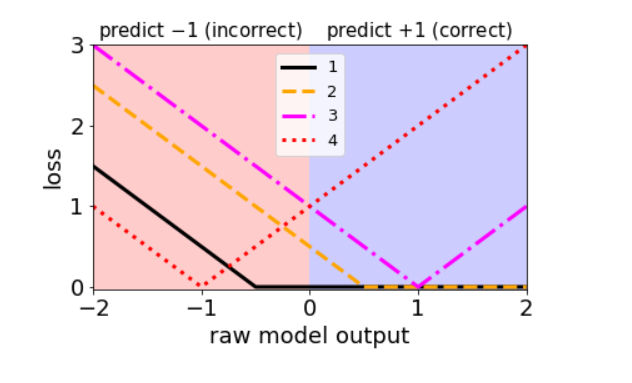

- 1 (not - This loss reaches zero in the red zone. There should be a penalty for incorrect predictions.)

- 2 (yes - This loss is very similar to the hinge loss used in SVMs (just shifted slightly).

- 3 (no - This loss increases in the blue zone. We don't want to penalize correct answers.)

- 4 (no - This loss increases in the blue zone. We don't want to penalize correct answers)

### Loss Function Visualization

**Comparing the logistic and hinge losses**  
In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.

The loss function diagram from the video is shown on the right.

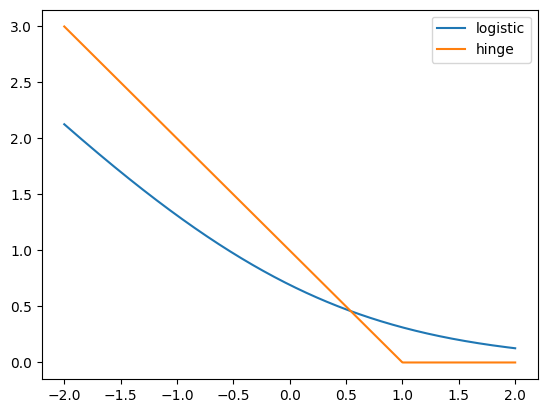

In [27]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

**Implementing logistic regression**  
This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!).

The log_loss() function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.

In [29]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        raw_model_output = w @ X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

from scipy.optimize import minimize
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Standardize the first 10 features as mentioned in the markdown
X = StandardScaler().fit_transform(X)[:, :10]

# Returns the w that makes my_loss(w) smallest
# Initialize weights with zeros matching the number of features
w_init = np.zeros(X.shape[1])
w_fit = minimize(my_loss, w_init).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
# Using default solver 'lbfgs' which handles L2 regularization by default
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X, y)
print(lr.coef_)

# logistic regression is just minimizing the loss function we've been looking at. Much more on logistic regression in the next chapter!

[ 2208.53353011  -187.55906076   750.90618805 -3608.34054458
  -133.18818982  -244.05895835  -106.72733712  -223.36142135
   -87.44650224   269.45038503]
[[ 2.73338052 -1.65192532  2.20690331 -9.33623298 -1.0880802   0.20775974
  -0.84976157 -2.40130375 -0.45569414  0.41676196]]
